In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# 1. Tạo dataframe 
df = pd.DataFrame({'S_cars': [643, 655, 702],
                   'M_cars': [469, 427, 525],
                   'X_cars': [484, 456, 402]})

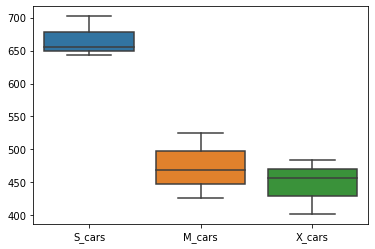

In [3]:
# 2. Vẽ boxplot, quan sát kết quả.
sns.boxplot(data=df)
plt.show()

In [4]:
 # 3. Áp dụng ANOVA
fvalue, pvalue = stats.f_oneway(df.S_cars, df.M_cars, df.X_cars)
print(fvalue, pvalue)

# get ANOVA table as R like output
# reshape the d dataframe suitable for statsmodels package
df_melt = pd.melt(df.reset_index(), id_vars = ['index'], 
                  value_vars = ['S_cars', 'M_cars', 'X_cars'])

# replace column names
df_melt.columns = ['index', 'cars', 'value']

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(cars)', data = df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
print(anova_table)

25.175411221637088 0.0012071270284831192


LinAlgError: SVD did not converge